<a href="https://colab.research.google.com/github/tajary/pumpguard/blob/main/pumpguard_ai_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample data:
    pair_name          time_window  tx_count  total_in     total_out  \
0  MATIC/USDC  2025-10-08 11:27:00        60    5847.0  1.380216e-09   
1  MATIC/USDC  2025-10-08 11:28:00         1     493.0  1.167188e-10   
2  MATIC/USDC  2025-10-08 11:29:00         3    1199.0  2.836030e-10   
3  MATIC/USDC  2025-10-08 11:30:00         5     496.0  1.172116e-10   
4  MATIC/USDC  2025-10-08 11:31:00         3     492.0  1.163865e-10   

   unique_senders  avg_price_ratio  
0               3     2.360320e-13  
1               1     2.367522e-13  
2               1     2.365088e-13  
3               4     2.363137e-13  
4               2     2.365579e-13  

🔥 Suspicious (pump/dump) activity detected:
        pair_name          time_window  tx_count      total_in     total_out  \
2672   MATIC/USDC  2025-10-11 00:27:00        26  4.678006e+04  1.019925e-08   
2688   MATIC/USDC  2025-10-11 00:44:00        25  7.613041e+04  1.579634e-08   
2689   MATIC/USDC  2025-10-11 00:45:00        2

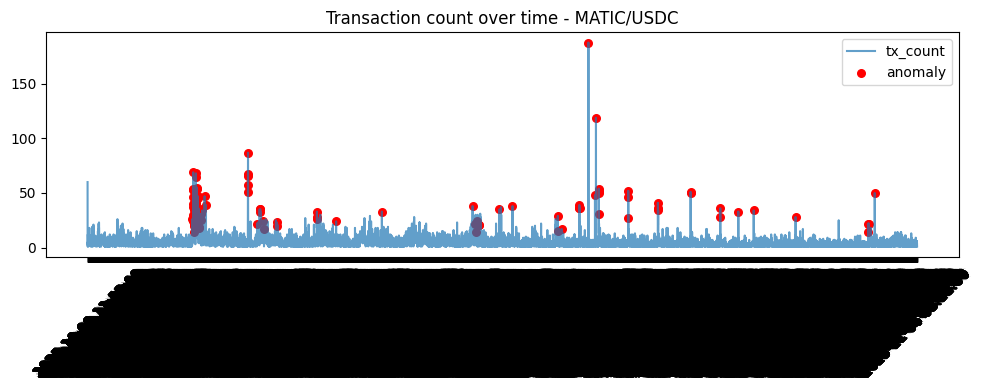

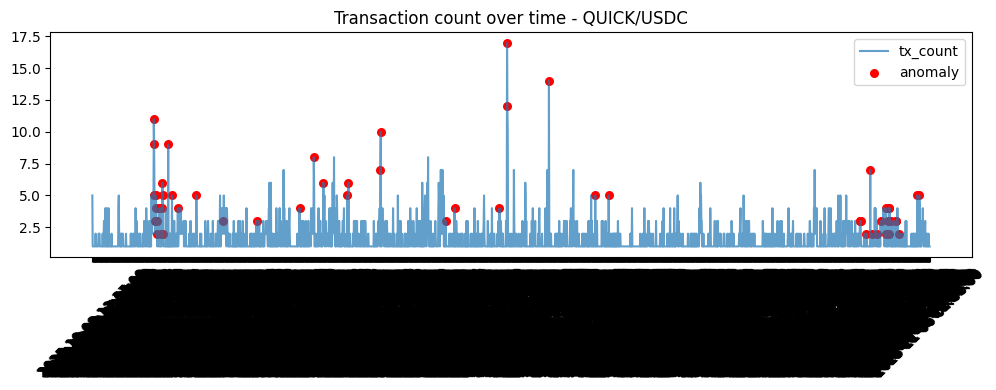

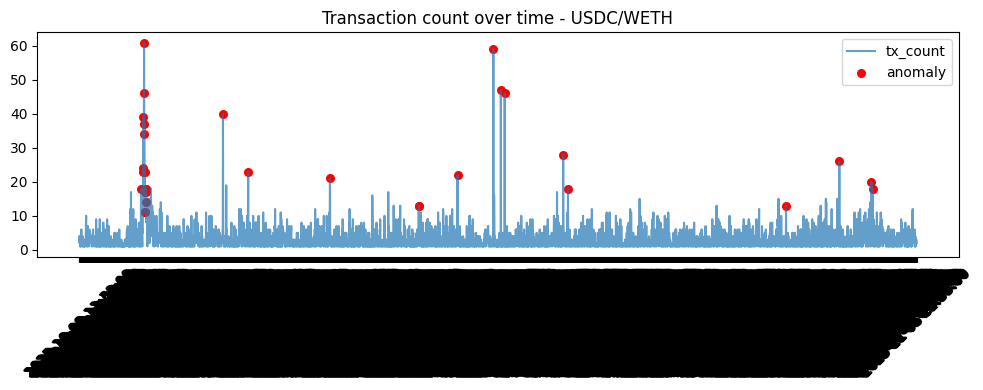

In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_json('/content/drive/MyDrive/pumpguradai/swaps_features.json')

print("Sample data:")
print(df.head())

df = df.dropna()
df = df[df['total_in'] > 0]
df = df[df['total_out'] > 0]

features = ['tx_count', 'total_in', 'total_out', 'unique_senders', 'avg_price_ratio']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

model = IsolationForest(contamination=0.01, random_state=42)
df['anomaly_score'] = model.fit_predict(X_scaled)

pumps = df[df['anomaly_score'] == -1]

print("\n🔥 Suspicious (pump/dump) activity detected:")
print(pumps[['pair_name', 'time_window', 'tx_count', 'total_in', 'total_out', 'unique_senders']])

for pair in df['pair_name'].unique():
    subset = df[df['pair_name'] == pair]
    plt.figure(figsize=(10,4))
    plt.title(f"Transaction count over time - {pair}")
    plt.plot(subset['time_window'], subset['tx_count'], label='tx_count', alpha=0.7)
    plt.scatter(pumps[pumps['pair_name']==pair]['time_window'],
                pumps[pumps['pair_name']==pair]['tx_count'],
                color='red', label='anomaly', s=30)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


398/398 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - loss: 0.0070 - val_loss: 7.2963e-04
Epoch 2/30
398/398 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - loss: 0.0021 - val_loss: 6.7365e-04
Epoch 3/30
398/398 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - loss: 0.0018 - val_loss: 6.5088e-04
Epoch 4/30
398/398 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - loss: 0.0016 - val_loss: 7.1750e-04
Epoch 5/30
398/398 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - loss: 0.0016 - val_loss: 6.4179e-04
Epoch 6/30
398/398 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - loss: 0.0015 - val_loss: 6.1328e-04
Epoch 7/30
398/398 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - loss: 0.0013 - val_loss: 6.3243e-04
Epoch 8/30
398/398 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - loss: 0.0015 - val_loss: 6.3052e-04
Epoch 9/30
398/398 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - loss: 0.0013 - val_loss: 6.7341e-04
Epoch 10/30
398/398 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - loss: 0.0013 - val_loss: 6.5496e-04
Epoch 11/30
398/398 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - loss: 0.0013 - val_loss: 6.4264e-

/tmp/ipython-input-206440525.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomalies['reconstruction_error'] = mse
/tmp/ipython-input-206440525.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomalies['is_anomaly'] = anomalies['reconstruction_error'] > threshold


🔎 Total anomalies detected: 85 out of 14142

🔥 susspecious activity:
       pair_name          time_window  tx_count      total_in     total_out  \
1402  MATIC/USDC  2025-10-09 17:01:00         6  3.369706e+03  8.100773e-10   
2673  MATIC/USDC  2025-10-11 00:28:00         9  6.217075e+03  1.347603e-09   
2694  MATIC/USDC  2025-10-11 00:50:00        69  1.096787e+06  1.516240e-07   
2695  MATIC/USDC  2025-10-11 00:51:00        46  8.077392e+05  8.639226e-08   
2696  MATIC/USDC  2025-10-11 00:52:00        37  2.570045e+05  2.802592e-08   

      unique_senders  avg_price_ratio  reconstruction_error  is_anomaly  
1402               5     2.404497e-13              0.009018        True  
2673               7     2.167470e-13              0.019627        True  
2694              19     1.404806e-13              0.012908        True  
2695              15     1.085581e-13              0.034952        True  
2696              12     1.090604e-13              0.100517        True  


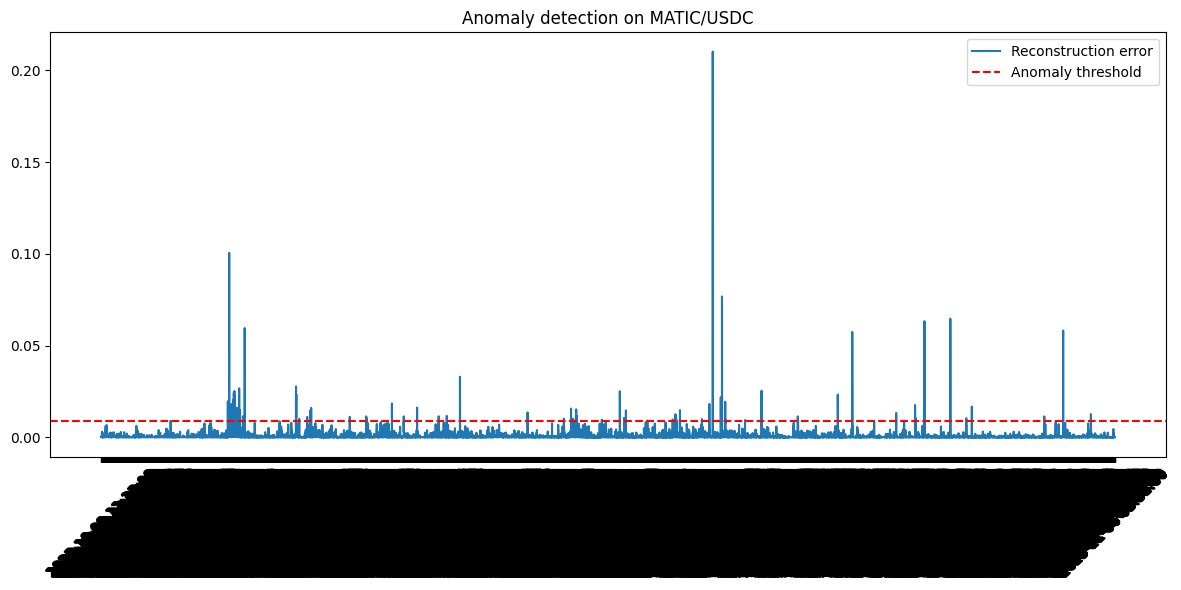

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

df = pd.read_json("/content/drive/MyDrive/pumpguradai/swaps_features.json")

pair = "MATIC/USDC"
df = df[df['pair_name'] == pair].sort_values('time_window')

df = df.dropna()

features = ['tx_count', 'total_in', 'total_out', 'unique_senders', 'avg_price_ratio']
data = df[features].values

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

TIME_STEPS = 20

X, y = [], []
for i in range(TIME_STEPS, len(scaled_data)):
    X.append(scaled_data[i - TIME_STEPS:i])
    y.append(scaled_data[i])
X, y = np.array(X), np.array(y)

model = Sequential([
    LSTM(128, input_shape=(X.shape[1], X.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(X.shape[2])
])

model.compile(optimizer='adam', loss='mse')

history = model.fit(X, y, epochs=30, batch_size=32, validation_split=0.1, verbose=1)

predicted = model.predict(X)
mse = np.mean(np.power(X[:, -1, :] - predicted, 2), axis=1)

threshold = np.mean(mse) + 3*np.std(mse)

anomalies = df.iloc[TIME_STEPS:]
anomalies['reconstruction_error'] = mse
anomalies['is_anomaly'] = anomalies['reconstruction_error'] > threshold

print(f"🔎 Total anomalies detected: {anomalies['is_anomaly'].sum()} out of {len(anomalies)}")

print("\n🔥 susspecious activity:")
print(anomalies[anomalies['is_anomaly']].head())

plt.figure(figsize=(12,6))
plt.plot(anomalies['time_window'], anomalies['reconstruction_error'], label='Reconstruction error')
plt.axhline(y=threshold, color='r', linestyle='--', label='Anomaly threshold')
plt.xticks(rotation=45)
plt.legend()
plt.title(f"Anomaly detection on {pair}")
plt.tight_layout()
plt.show()
